# Recurrent Neural Networks

calcular o preço das ações do google

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [5]:
# Part 2 - Building the RNN --Somente com GRU

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [6]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 500, batch_size = 32)

Epoch 1/500
38/38 [==============================] - 12s 84ms/step - loss: 0.0975
Epoch 2/500
38/38 [==============================] - 3s 89ms/step - loss: 0.0063
Epoch 3/500
38/38 [==============================] - 3s 90ms/step - loss: 0.0052
Epoch 4/500
38/38 [==============================] - 3s 86ms/step - loss: 0.0049
Epoch 5/500
38/38 [==============================] - 4s 96ms/step - loss: 0.0048
Epoch 6/500
38/38 [==============================] - 4s 98ms/step - loss: 0.0038
Epoch 7/500
38/38 [==============================] - 3s 90ms/step - loss: 0.0036
Epoch 8/500
38/38 [==============================] - 4s 94ms/step - loss: 0.0036
Epoch 9/500
38/38 [==============================] - 3s 90ms/step - loss: 0.0035: 1s -
Epoch 10/500
38/38 [==============================] - 3s 92ms/step - loss: 0.0042
Epoch 11/500
38/38 [==============================] - 3s 88ms/step - loss: 0.0032
Epoch 12/500
38/38 [==============================] - 3s 87ms/step - loss: 0.0031
Epoch 13/500
38/38

Epoch 100/500
38/38 [==============================] - 4s 98ms/step - loss: 0.0015
Epoch 101/500
38/38 [==============================] - 4s 95ms/step - loss: 0.0016
Epoch 102/500
38/38 [==============================] - 4s 96ms/step - loss: 0.0015
Epoch 103/500
38/38 [==============================] - 4s 96ms/step - loss: 0.0013
Epoch 104/500
38/38 [==============================] - 4s 97ms/step - loss: 0.0014
Epoch 105/500
38/38 [==============================] - 4s 97ms/step - loss: 0.0013
Epoch 106/500
38/38 [==============================] - 4s 100ms/step - loss: 0.0011
Epoch 107/500
38/38 [==============================] - 4s 99ms/step - loss: 0.0012
Epoch 108/500
38/38 [==============================] - 4s 101ms/step - loss: 0.0013
Epoch 109/500
38/38 [==============================] - 4s 106ms/step - loss: 0.0013
Epoch 110/500
38/38 [==============================] - 4s 108ms/step - loss: 0.0014
Epoch 111/500
38/38 [==============================] - 4s 99ms/step - loss: 0.0012


38/38 [==============================] - 3s 86ms/step - loss: 8.9225e-04
Epoch 197/500
38/38 [==============================] - 3s 86ms/step - loss: 7.8763e-04
Epoch 198/500
38/38 [==============================] - 3s 88ms/step - loss: 8.8186e-04
Epoch 199/500
38/38 [==============================] - 3s 88ms/step - loss: 8.9340e-04
Epoch 200/500
38/38 [==============================] - 3s 90ms/step - loss: 9.2220e-04: 1s - lo
Epoch 201/500
38/38 [==============================] - 3s 91ms/step - loss: 7.3689e-04: 0s - loss: 
Epoch 202/500
38/38 [==============================] - 3s 90ms/step - loss: 8.3555e-04
Epoch 203/500
38/38 [==============================] - 3s 89ms/step - loss: 9.7589e-04
Epoch 204/500
38/38 [==============================] - 3s 92ms/step - loss: 0.0011
Epoch 205/500
38/38 [==============================] - 4s 95ms/step - loss: 9.9429e-04
Epoch 206/500
38/38 [==============================] - 3s 91ms/step - loss: 7.8289e-04
Epoch 207/500
38/38 [==================

38/38 [==============================] - 4s 98ms/step - loss: 7.1037e-04
Epoch 290/500
38/38 [==============================] - 4s 98ms/step - loss: 9.1243e-04
Epoch 291/500
38/38 [==============================] - 4s 102ms/step - loss: 9.1890e-04
Epoch 292/500
38/38 [==============================] - 4s 101ms/step - loss: 7.7854e-04
Epoch 293/500
38/38 [==============================] - 4s 99ms/step - loss: 0.0011
Epoch 294/500
38/38 [==============================] - 4s 97ms/step - loss: 7.2482e-04
Epoch 295/500
38/38 [==============================] - 4s 97ms/step - loss: 8.9537e-04
Epoch 296/500
38/38 [==============================] - 4s 100ms/step - loss: 8.9335e-04
Epoch 297/500
38/38 [==============================] - 4s 99ms/step - loss: 8.7864e-04
Epoch 298/500
38/38 [==============================] - 4s 98ms/step - loss: 9.9102e-04
Epoch 299/500
38/38 [==============================] - 4s 99ms/step - loss: 9.9710e-04
Epoch 300/500
38/38 [==============================] - 4s 

38/38 [==============================] - 4s 97ms/step - loss: 8.8876e-04
Epoch 383/500
38/38 [==============================] - 4s 97ms/step - loss: 0.0010
Epoch 384/500
38/38 [==============================] - 4s 97ms/step - loss: 7.3334e-04
Epoch 385/500
38/38 [==============================] - 4s 97ms/step - loss: 8.1023e-04
Epoch 386/500
38/38 [==============================] - 4s 96ms/step - loss: 8.4914e-04
Epoch 387/500
38/38 [==============================] - 4s 100ms/step - loss: 7.7234e-04
Epoch 388/500
38/38 [==============================] - 4s 98ms/step - loss: 8.9667e-04: 0s - loss: 8.9953e-0
Epoch 389/500
38/38 [==============================] - 4s 96ms/step - loss: 7.6907e-04
Epoch 390/500
38/38 [==============================] - 4s 97ms/step - loss: 7.5842e-04
Epoch 391/500
38/38 [==============================] - 4s 97ms/step - loss: 8.9914e-04
Epoch 392/500
38/38 [==============================] - 4s 96ms/step - loss: 8.2846e-04
Epoch 393/500
38/38 [=================

38/38 [==============================] - 4s 105ms/step - loss: 9.3929e-04
Epoch 476/500
38/38 [==============================] - 3s 89ms/step - loss: 8.2757e-04
Epoch 477/500
38/38 [==============================] - 3s 86ms/step - loss: 8.5820e-04
Epoch 478/500
38/38 [==============================] - 3s 86ms/step - loss: 8.6522e-04
Epoch 479/500
38/38 [==============================] - 3s 86ms/step - loss: 8.8230e-04: 1s
Epoch 480/500
38/38 [==============================] - 3s 85ms/step - loss: 8.0026e-04
Epoch 481/500
38/38 [==============================] - 3s 88ms/step - loss: 7.5115e-04
Epoch 482/500
38/38 [==============================] - 3s 92ms/step - loss: 8.2907e-04
Epoch 483/500
38/38 [==============================] - 3s 89ms/step - loss: 7.8219e-04
Epoch 484/500
38/38 [==============================] - 3s 91ms/step - loss: 7.8902e-04
Epoch 485/500
38/38 [==============================] - 3s 91ms/step - loss: 7.0497e-04: 0s - loss
Epoch 486/500
38/38 [====================

In [10]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

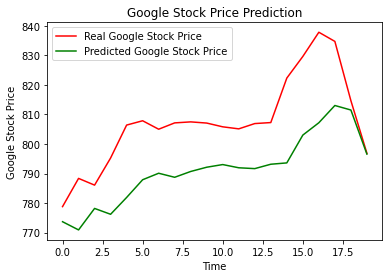

In [36]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

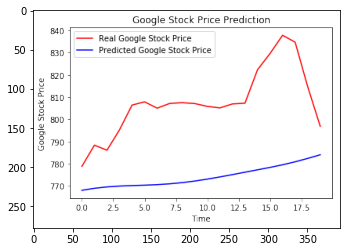

In [37]:
#Comparando os gráficos -- gráfico dado pelo código do professor e gráfico obtido nesse codigo
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img2 = mpimg.imread('grafico_prof.png')
imgplot = plt.imshow(img2)
plt.show()



## FIM